### Importing Libraries ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('D:\\Projects\\Human Activity Recognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Projects\Human Activity Recognition\Human Activity Recognition_Neural Networks.ipynb
D:\Projects\Human Activity Recognition\test.csv
D:\Projects\Human Activity Recognition\train.csv
D:\Projects\Human Activity Recognition\.ipynb_checkpoints\Human Activity Recognition_Neural Networks-checkpoint.ipynb


In [2]:
training_data=pd.read_csv('D:\\Projects\\Human Activity Recognition\\train.csv')
test_data=pd.read_csv('D:\\Projects\\Human Activity Recognition\\test.csv')

In [3]:
print("Training Data: {}".format(training_data.shape))
print("Any Null Values In the Training Data: {}".format(training_data.isnull().values.any()))



print("Test Data: {}".format(test_data.shape))
print("Any Null Values In the Test Data: {}".format(test_data.isnull().values.any()))

Training Data: (7352, 563)
Any Null Values In the Training Data: False
Test Data: (2947, 563)
Any Null Values In the Test Data: False


In [4]:
X_train=training_data.iloc[:,:-2]
y_train=training_data.iloc[:,-1]

X_test=test_data.iloc[:,:-2]
y_test=test_data.iloc[:,-1]

In [5]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())

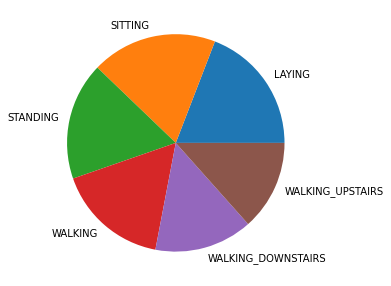

In [6]:
plt.figure(figsize=(15,5))
plt.pie(Category_count,labels=activity);

In [7]:
acc=0
gyro=0
others=0
for column in training_data.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1

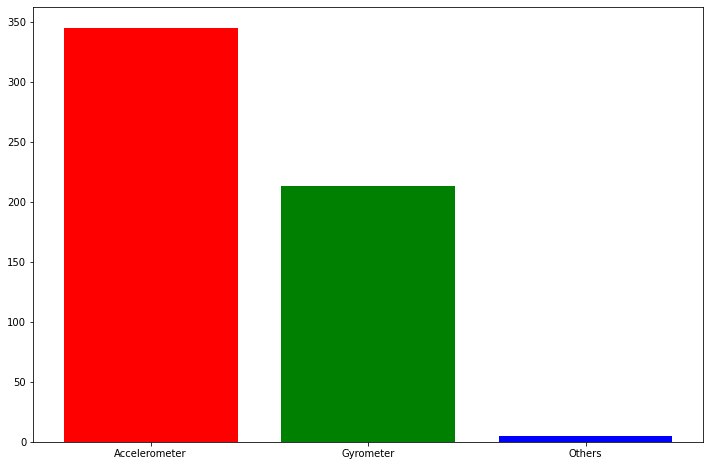

In [8]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['r','g','b']);

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [16]:
explained_variance

array([5.07811723e-01, 6.58068027e-02, 2.80643677e-02, 2.50395275e-02,
       1.88828501e-02, 1.72400642e-02, 1.37101147e-02, 1.19907768e-02,
       9.95859511e-03, 9.65086590e-03, 8.60051649e-03, 8.00280950e-03,
       7.63996369e-03, 6.45328924e-03, 6.32324346e-03, 5.99722090e-03,
       5.86750302e-03, 5.75407392e-03, 5.67921047e-03, 5.27295779e-03,
       5.00362925e-03, 4.88408406e-03, 4.78205784e-03, 4.68562930e-03,
       4.49289260e-03, 4.21027243e-03, 4.17978682e-03, 4.05570369e-03,
       3.88524168e-03, 3.87018044e-03, 3.65958878e-03, 3.54553381e-03,
       3.47942606e-03, 3.37187109e-03, 3.29676999e-03, 3.28215050e-03,
       3.20529478e-03, 2.95614939e-03, 2.86722415e-03, 2.85074548e-03,
       2.68766324e-03, 2.65619859e-03, 2.63405989e-03, 2.58850596e-03,
       2.49054872e-03, 2.46954034e-03, 2.40679913e-03, 2.36115075e-03,
       2.30278857e-03, 2.27567245e-03, 2.20164699e-03, 2.13466984e-03,
       2.07704456e-03, 2.02496620e-03, 1.99779441e-03, 1.97750625e-03,
      

In [18]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [19]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=X_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(X_train,y_train,batch_size=256,epochs=22,validation_data=(X_test,y_test))

Epoch 1/22
29/29 [==============================] - 0s 6ms/step - loss: 1.5592 - accuracy: 0.4600 - val_loss: 1.0782 - val_accuracy: 0.3526
Epoch 2/22
29/29 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.7319 - val_loss: 0.3313 - val_accuracy: 0.8487
Epoch 3/22
29/29 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9513 - val_loss: 0.1382 - val_accuracy: 0.9505
Epoch 4/22
29/29 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.1165 - val_accuracy: 0.9579
Epoch 5/22
29/29 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.1082 - val_accuracy: 0.9627
Epoch 6/22
29/29 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9935 - val_loss: 0.1039 - val_accuracy: 0.9623
Epoch 7/22
29/29 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.1135 - val_accuracy: 0.9637
Epoch 8/22
29/29 [==

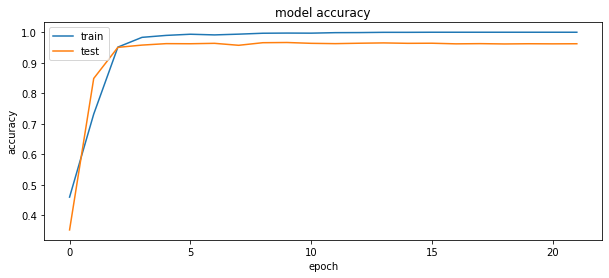

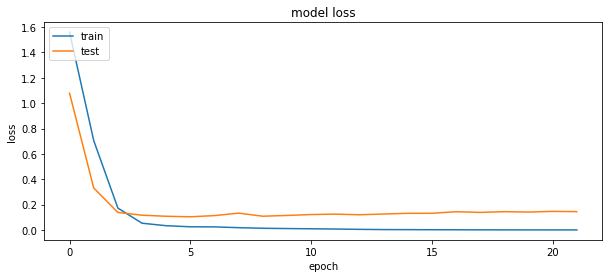

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred=model.predict(X_test)

In [24]:
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)

In [25]:
y_test_class

array([2, 2, 2, ..., 5, 5, 5], dtype=int64)

In [26]:
y_pred_class

array([2, 2, 1, ..., 5, 5, 5], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test_class,y_pred_class)
accuracy=accuracy_score(y_test_class,y_pred_class)

In [28]:
cm

array([[537,   0,   0,   0,   0,   0],
       [  1, 432,  57,   0,   0,   1],
       [  0,  19, 513,   0,   0,   0],
       [  0,   0,   0, 492,   2,   2],
       [  0,   0,   0,   3, 410,   7],
       [  0,   0,   0,  19,   0, 452]], dtype=int64)

In [29]:
accuracy

0.9623345775364778